## Risikoanalyse in Bezug auf Terroranschläge für international tätige Reiseunternehmen

## Inhaltsverzeichnis

[1. Einleitung](#1-einleitung)  
[2. Explorative Datenanalyse](#2-explorative-datenanalyse)  
[3. Unifying & Transformation](#3-unifying--transformation)  
[4. Data Cleansing](#4-data-cleansing)  
[5. Analysis & Validation](#5-analysis--validation)  
[6. Feature Selection & Engineering](#6-feature-selection--engineering)  
[7. Anwendung in Machine Learning](#7-anwendung-in-machine-learning)  
[8. Anwendung von XAI - Techniken](#8-anwendung-von-xai---techniken)  
[9. Fazit](#9-fazit)  
[10. Quellenverzeichnis](#10-quellenverzeichnis)

## 1. Einleitung

<u>Projektmitglieder:</u>

Elias Wolfsberger (wolfseli@students.zhaw.ch), Oliver Brennwald (brennoli@students.zhaw.ch), Florian Rieser (rieseflo@students.zhaw.ch)<br><br>

<u>Datenquelle:</u>

Global terrorism database (START, 2022)<br><br>

<u>Problem- & Fragestellung:</u>

Angesichts der wachsenden globalen Unsicherheiten und der Bedrohung durch Terrorismus sehen sich Reisebüros mit der Aufgabe konfrontiert, ihre Kunden über potenzielle Risiken zu informieren. Terroranschläge können nicht nur die Sicherheit von Reisen beeinträchtigen, sondern auch das Vertrauen der Reisenden in bestimmte Reiseziele untergraben. Vor diesem Hintergrund stellt sich die zentrale Frage: Wie können wir mithilfe der Global Terrorism Database (GTD) und moderner Machine-Learning-Technologien ein Prognosemodell entwickeln, das mögliche terroristische Angriffe in verschiedenen Regionen vorhersagt und den Reisebüros hilft, informierte Entscheidungen zu treffen, um ihre Kunden besser zu schützen?<br><br>

<u>Zielsetzung:</u>

Das Hauptziel dieses Projekts besteht darin, ein präzises und effektives Prognosemodell zu entwickeln, das auf der Analyse von Daten aus der Global Terrorism Database basiert. Dieses Modell wird darauf abzielen, Muster und Trends in Bezug auf terroristische Aktivitäten zu identifizieren und Vorhersagen über zukünftige Angriffe zu treffen. Durch die Bereitstellung dieser Informationen wollen wir Reisebüros einen signifikanten Mehrwert bieten, indem sie proaktive Massnahmen zur Risikominderung ergreifen können. Das letztliche Ziel besteht darin, die Sicherheit und das Vertrauen der Reisenden zu fördern, indem eine fundierte Entscheidungsgrundlage geschaffen wird.<br><br>

<u>Vorgehen & Methoden:</u>

1. Explorative Datenanalyse 

2. Unifying & Transformation

3. Data Cleansing

4. Analysis & Validation

5. Feature Selection & Engineering

6. Anwendung in Machine Learning

7. Anwendung von XAI - Techniken

## 2. Explorative Datenanalyse

Zuerst werden die benötigten Bibliotheken importiert.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point

Nun wird die xlsx-Datei mit den Daten in einen Pandas Data-Frame geladen.   
Ausserdem verschaffen wir uns einen Überblick über die Daten, indem wir uns mit dem Attribut `v.shape` die Anzahl der Spalten und Zeilen des DataFrames anzeigen lassen.   
Um einen Einblick in die Daten zu bekommen, lassen wir uns zusätzlich mit der Funktion `.head()` die ersten 5 Zeilen des DataFrames anzeigen.

In [2]:
# Daten laden
df = pd.read_excel('data/globalterrorismdb_0522dist.xlsx')

In [3]:
# Anzahl der Zeilen und Spalten anzeigen
print(df.shape)

print("--------------------")

# Erste 5 Zeilen anzeigen
df.head()

(209706, 135)
--------------------


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Der Datensatz besteht aus 135 Spalten und 209'706 Zeilen.  
Es werden aber noch nicht alle Spalten angezeigt. Dies wird mit `display.max.columns` geändert.   
Danach lassen wir uns diesmal die letzten 5 Zeilen ausgeben, um zu prüfen, ob nun alle Spalten angezeigt werden.

In [4]:
# Alle Spalten anzeigen lassen
pd.set_option('display.max_columns', None)

# letzte 5 Zeilen anzeigen
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
209701,202012310015,2020,12,31,2020-12-31 00:00:00,0,NaT,228,Yemen,10,Middle East & North Africa,Al Hudaydah,Sabaa,15.305307,43.019490,2.0,0,NaN,12/31/2020: Assailants fired mortar shells tar...,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Residences,228.0,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houthi extremists (Ansar Allah),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,NaN,0.0,0.0,NaN,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,Houses and buildings damaged,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Al Houthi militia escalated in Hays and targe...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
209702,202012310016,2020,12,31,2020-12-31 00:00:00,0,NaT,228,Yemen,10,Middle East & North Africa,Al Hudaydah,Beit Maghari,13.931337,43.478924,2.0,0,The incident occurred in the Hays district.,12/31/2020: Assailants attempted to plant expl...,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Residences,228.0,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houthi extremists (Ansar Allah),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,8.0,Landmine,6.0,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Al Houthi militia escalated in Hays and targe...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
209703,202012310017,2020,12,31,NaN,0,NaT,75,Germany,8,Western Europe,Lower Saxony,Leipzig,51.342239,12.374772,1.0,0,NaN,12/31/2020: Assailants set fire to German Army...,1,1,0,1,1.0,Insurgency/Guerilla Action,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,4,Military,35.0,Military Transportation/Vehicle (excluding con...,German Army,Wolf-Class Vehicles,75.0,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left-wing extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,7.0,"Posted to website, blog, etc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,Incendiary,18.0,Arson/Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Military vehicles damaged,0.0,NaN,NaN,NaN,NaN,Na

### 2.1 Datentypen anzeigen

Nun möchten wir prüfen welche Datentypen das DataFrame enthält.   
Dazu geben wir mit `.info()` die Datentypen aller Spalten aus.

In [5]:
# info über die Daten
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype         
---   ------              --------------   -----         
 0    eventid             209706 non-null  int64         
 1    iyear               209706 non-null  int64         
 2    imonth              209706 non-null  int64         
 3    iday                209706 non-null  int64         
 4    approxdate          12689 non-null   object        
 5    extended            209706 non-null  int64         
 6    resolution          4861 non-null    datetime64[ns]
 7    country             209706 non-null  int64         
 8    country_txt         209706 non-null  object        
 9    region              209706 non-null  int64         
 10   region_txt          209706 non-null  object        
 11   provstate           209706 non-null  object        
 12   city                209279 non-null  object        
 13   latitude    

Wir finden folgende Datentypen in unserem DataFrame:

   - **int64 (23 Spalten)**: Ganze Zahlen, oft als Indikatoren (z. B. `crit1`, `crit2`), IDs (`eventid`, `country`), oder Kategorisierungen (`attacktype1`) verwendet.
   - **float64 (54 Spalten)**: Gleitkommazahlen, die meist numerische Messungen oder Zählungen darstellen. Zum Beispiel `nkill` (Anzahl der Toten) oder `nwound` (Anzahl der Verwundeten).
   - **datetime64[ns] (1 Spalte)**: Die Spalte `resolution` enthält als einzige Spalte Datumswerte.
   - **object (57 Spalten)**: Enthält hauptsächlich Zeichenketten (Strings) und wird für Textfelder Namen oder Beschreibungen verwendet, wie z.B. `country_txt`, `city` und `summary`.

Zur Vollständigkeit der Daten lässt sich folgenden feststellen:

   - Einige Spalten sind vollständig gefüllt und haben keine fehlenden Werte (z. B. `eventid`, `iyear`, `extended`).
   - Viele Spalten weisen jedoch eine hohe Anzahl an fehlenden Werten (`null`) auf, insbesondere bei seltener dokumentierten oder spezifischen Informationen, wie `ransomamt` (nur 1.533 Einträge) oder `claimmode3_txt` (nur 140 Einträge).
   - Diese fehlenden Werte deuten darauf hin, dass bestimmte Details oft nicht verfügbar oder selten dokumentiert sind.


### 2.2 Statistische Analyse

Wir möchten uns nun einen genaueren Überblick über die Werte verschaffen.   
Dazu nutzen wird die Funktion `.describe()`.

In [6]:
# Statistische Zusammenfassung
df.describe()

,eventid,iyear,imonth,iday,extended,resolution,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.097060e+05,209706.000000,209706.000000,209706.000000,209706.000000,4861,209706.000000,209706.000000,205015.000000,205014.000000,209705.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,35249.000000,209705.000000,209706.000000,209706.000000,209706.000000,8434.000000,658.000000,209706.000000,197867.000000,207692.000000,14535.000000,14003.000000,14211.000000,1629.000000,1539.000000,1600.000000,209326.000000,2538.000000,410.000000,209706.000000,138613.000000,140233.000000,143613.000000,24696.000000,2476.000000,732.000000,409.000000,140.000000,4954.000000,209706.000000,183765.000000,16402.000000,14292.000000,2371.000000,2132.000000,73.000000,70.000000,197179.000000,145269.000000,141547.000000,189770.000000,145009.000000,138800.000000,209706.000000,73464.000000,4.837500e+04,209528.000000,16667.000000,16612.000000,4985.000000,10301.000000,80466.000000,1.533000e+03,7.340000e+02,9.510000e+02,725.000000,14091.000000,13494.000000,209706.000000,209706.000000,209706.000000,209706.000000
mean,2.004867e+11,2004.800993,6.455285,15.527930,0.051525,2006-12-14 11:22:40.581978880,130.291351,7.279854,23.358696,30.416738,1.468387,0.068854,0.988265,0.993291,0.866246,-0.423593,1.293001,0.145900,0.883628,0.035469,3.351311,3.956011,5.705167,8.484078,47.163034,127.079035,10.050705,54.641720,126.196749,10.171885,55.948668,132.108125,0.075949,0.258077,0.185366,0.003929,-68.819613,-1.341261,0.079095,7.069768,0.235864,7.312842,0.337408,6.692857,-6.131005,6.543060,11.081294,6.986404,11.206969,7.138338,12.407598,6.246575,10.842857,2.431030,0.038797,0.559122,3.085872,0.034177,0.137759,-0.712927,3.289407,1.750017e+05,0.052967,3.040559,-0.311281,-55.121916,-36.012717,-0.157520,2.791526e+06,3.211036e+05,6.204108e+05,182.750345,4.705912,-31.945531,-4.424289,-4.339318,0.086841,-3.850758
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,1970-03-08 00:00:00,4.000000,1.000000,-53.154613,-176.176447,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,0.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-100.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.992080e+11,1992.000000,4.000000,8.000000,0.000000,1997-05-22 00:00:00,69.000000,6.000000,11.510046,8.748117,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,5.250000,3.000000,22.000000,78.000000,4.000000,29.000000,60.000000,4.000000,32.000000,45.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,7.000000,0.000000,6.000000,0.000000,4.000000,-9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-9.900000e+01,0.000000,1.000000,0.000000,-99.000000,-99.000000,0.000000,0.0000

**Durchschnittswerte (Mean)**:  
   Die Spalten zeigen eine breite Variation der Mittelwerte. Beispielwerte:
   - `iyear` (Jahr): Durchschnitt bei ca. **2004.8**, was auf die Zeitspanne der Daten hindeutet.
   - `nkill` (Anzahl der Toten): Durchschnitt von etwa **2.79** deutet auf eine eher niedrige Opferzahl bei den meisten Ereignissen hin.
   - `propvalue` (Eigentumsschadenwert): Durchschnittswert bei **40369.42**, was zeigt, dass einige Ereignisse signifikante wirtschaftliche Verluste verursacht haben.

**Streuung (Standardabweichung)**:  
   Hohe Standardabweichungen in Spalten wie `nkill` (ca. **38.93**) und `propvalue` (ca. **6.2 Millionen**) zeigen, dass es signifikante Unterschiedemit mit möglichen Extremwerten zwischen den einzelnen Ereignissen gibt.

**Minimale und maximale Werte**:  
   Die Minima und Maxima verdeutlichen die Bandbreite der Daten:
   - `iyear` reicht von **1970** bis **2020**.
   - `nkill` variiert von **0** bis **1700**.
   - `propvalue` reicht von **0** bis **2.7 Milliarden**, was Extremwerte für Sachschäden widerspiegelt.
**Perzentile (25%, 50%, 75%)**:  
   Die Verteilung der Werte zeigt, dass:
   - 25% der Werte von `nkill` bei **0** liegen, was darauf hinweist, dass viele Ereignisse keine Todesopfer forderten.
   - 50% (Median) der `nkill`-Werte ebenfalls bei **0** liegen, was zeigt, dass die Mehrheit der Ereignisse geringe oder keine Todesopfer zur Folge hatte.
   - Bei `propvalue` liegen 75% der Werte bei **0**, was auf selten dokumentierte oder geringe Schadenswerte bei den meisten Ereignissen schließen lässt.


Mit `include=object` sorgen wir dafür, dass wir auch Informationen zu den Spalten die Objekte enthalten erhalten.   

In [7]:
# Statistische Zusammenfassung für kategorische Spalten
df.describe(include='object')

,approxdate,country_txt,region_txt,provstate,city,location,summary,alternative_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,targtype2_txt,targsubtype2_txt,corp2,target2,natlty2_txt,targtype3_txt,targsubtype3_txt,corp3,target3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,claimmode_txt,claimmode2_txt,claimmode3_txt,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,weaptype3_txt,weapsubtype3_txt,weaptype4_txt,weapsubtype4_txt,weapdetail,propextent_txt,propcomment,divert,kidhijcountry,ransomnote,hostkidoutcome_txt,addnotes,scite1,scite2,scite3,dbsource,related
count,12689,209706,209706,209706,209279,67475,143586,35249,209706,8434,658,209706,197867,167170,209069,207692,14535,14003,13508,14410,14211,1629,1539,1478,1628,1600,209706,7230,2579,184,414,23,55058,24696,732,140,209706,183765,16402,14292,2371,2132,73,70,123137,73464,67424,338,3313,573,14091,35809,143524,92743,52676,209706,30604
unique,3305,204,12,2623,45147,51346,140085,5,9,9,7,22,112,38367,93526,215,22,108,3124,5752,161,20,93,507,850,116,3725,1369,490,71,137,16,17805,11,9,8,12,30,11,28,10,22,5,16,21362,5,21951,145,217,444,7,18814,103169,74763,43554,26,9392
top,"September 18-24, 2016",Iraq,Middle East & North Africa,Baghdad,Unknown,"The attack took place in Baghdad, Baghdad, Iraq.","09/00/2016: Sometime between September 18, 201...",Insurgency/Guerilla Action,Bombing/Explosion,Armed Assault,Facility/Infrastructure Attack,Private Citizens & Property,Unnamed Civilian/Unspecified,Unknown,Civilians,Iraq,Private Citizens & Property,Unnamed Civilian/Unspecified,Not Applicable,Civilians,Afghanistan,Private Citizens & Property,Unnamed Civilian/Unspecified,Not Applicable,Civilians,Afghanistan,Unknown,Militants,Taliban,The Family,Free Syrian Army,Jaysh al-Nukhba; Al-Izzah,Unknown,Personal claim,Unknown,Unknown,Explosives,Unknown Explosive Type,Firearms,Unknown Gun Type,Firearms,Knife or Other Sharp Object,Firearms,Automatic or Semi-Automatic Rifle,Explosive,Minor (likely < $1 million),It is unknown if any property was damaged in t...,Unknown,Colombia,0,Unknown,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,"201612010023, 201612010024, 201612010025, 2016..."
freq,101,27521,58252,8087,11067,142,100,28803,98158,4377,440,51985,13552,20462,8071,26873,7007,4374,4544,3139,2471,803,464,529,324,283,91906,480,84,20,21,5,14877,7156,256,32,103475,48807,6389,3358,969,397,29,16,20918,50337,7026,27,687,35,4798,1605,205,134,139,106002,80


**Eintragsanzahl (Count)**:  
   Jede Spalte in dieser Kategorie enthält **209.706 Einträge**. Dies zeigt, dass jede Kategorie über die gesamte Datenmenge hinweg vertreten ist, obwohl einige Werte `NaN` oder unbekannt sein könnten.

**Anzahl eindeutiger Werte (Unique)**:  
   Die Zahl der eindeutigen Einträge variiert je nach Spalte:
   - `country_txt` (Ländernamen) hat **204 eindeutige Werte**, was auf eine breite geografische Abdeckung hinweist.
   - `city` hat **45.148 eindeutige Werte**, was die Vielfalt der betroffenen Städte aufzeigt.
   - `attacktype1_txt` (Angriffstyp) hat **9 eindeutige Werte**, was eine begrenzte, festgelegte Liste an Angriffskategorien vermuten lässt.

**Häufigster Wert (Top)** und **Häufigkeit (Freq)**:  
   - In `country_txt` ist der häufigste Wert **"Iraq"**.  Dort fanden die meisten dokumentierten Ereignisse statt (27.521 Ereignisse).
   - In `attacktype1_txt` (Art des Angriffs) ist der häufigste Wert **"Bombing/Explosion"** mit **98.158 Einträgen**.
   - `target1` hat am häufigsten den Wert **"Civilians"** mit **80.71** Einträgen.

**Bedeutung von Häufigkeiten**:  
   Die Top-Werte und deren Häufigkeiten verdeutlichen, welche Länder, Angriffstypen, und Ziele überproportional häufig in den Daten vorkommen, und zeigen damit Schwerpunkte der dokumentierten Ereignisse. Beispielsweise ist **"START Primary Collection"** in der Spalte `dbsource` der häufigste Wert, was auf eine bevorzugte Datenquelle hinweist.

**Verteilung in Spalten mit hoher Einzigartigkeit**:  
   Spalten wie `summary`, `location` und `addnotes` haben jeweils über **10.000 eindeutige Werte**, was darauf hindeutet, dass jede Beobachtung individuelle Beschreibungen oder spezifische Standorte aufweist.


Nun  erstellen wir einige Visualisierungen der Daten um die Verteilung der Datenpunkte besser zu verstehen.

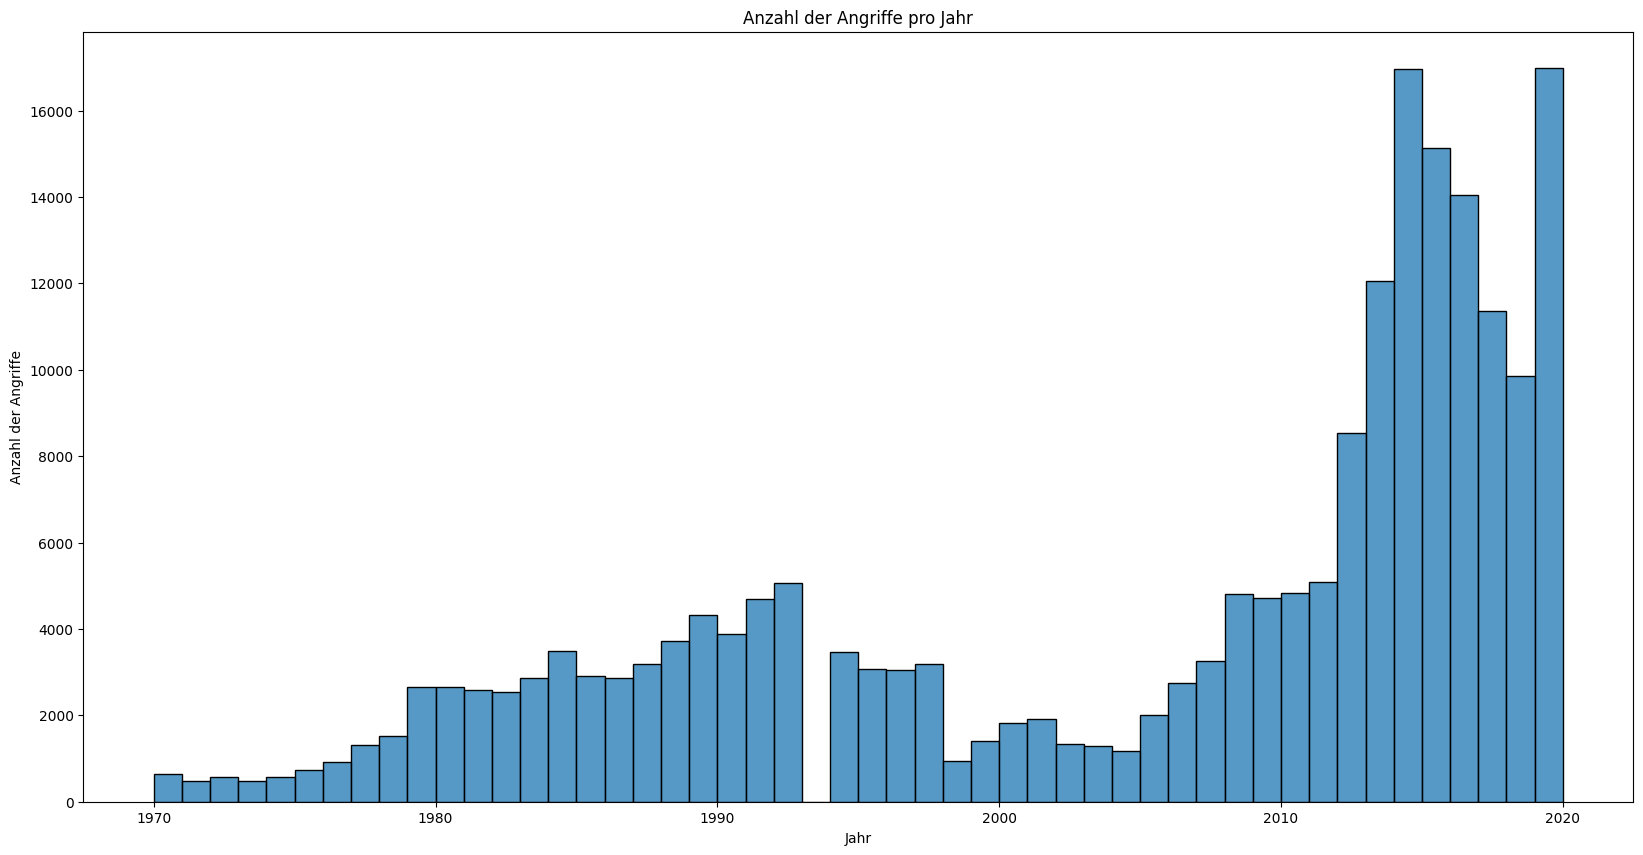

In [8]:
# histogramm der Anzahl der Angriffe pro Jahr
plt.figure(figsize=(20,10))
sns.histplot(df['iyear'], bins=50, kde=False)
plt.title('Anzahl der Angriffe pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Angriffe')
plt.show()

- Es gibt einen allmählichen Anstieg der Angriffe von den 1970er bis in die 1980er Jahre, mit gelegentlichen Spitzen und leichten Rückgängen.
- In den 1990er Jahren ist zunächst ein Rückgang der Angriffe zu erkennen, gefolgt von einem erneuten Anstieg zu Beginn der 2000er Jahre.
- Ab etwa 2010 beginnt ein deutlicher Anstieg, der in den letzten Jahren (ca. 2019–2020) die höchsten Werte erreicht, mit Spitzen von über 16.000 Angriffen pro Jahr.

Wir stellen fest, dass es für das Jahr 1993 keine Daten gibt. Den Grund dafür finden wir im "GTD Codebook". Diese Daten gingen verloren und konnten nur zu etwa 15% wieder hergestellt werden.   
Um zu verhindern, dass Nutzer die niedrige Häufigkeit im Jahr 1993 als tatsächliche Zahl fehlinterpretieren, wurde beschlossen diese Daten komplett auszuschliessen.

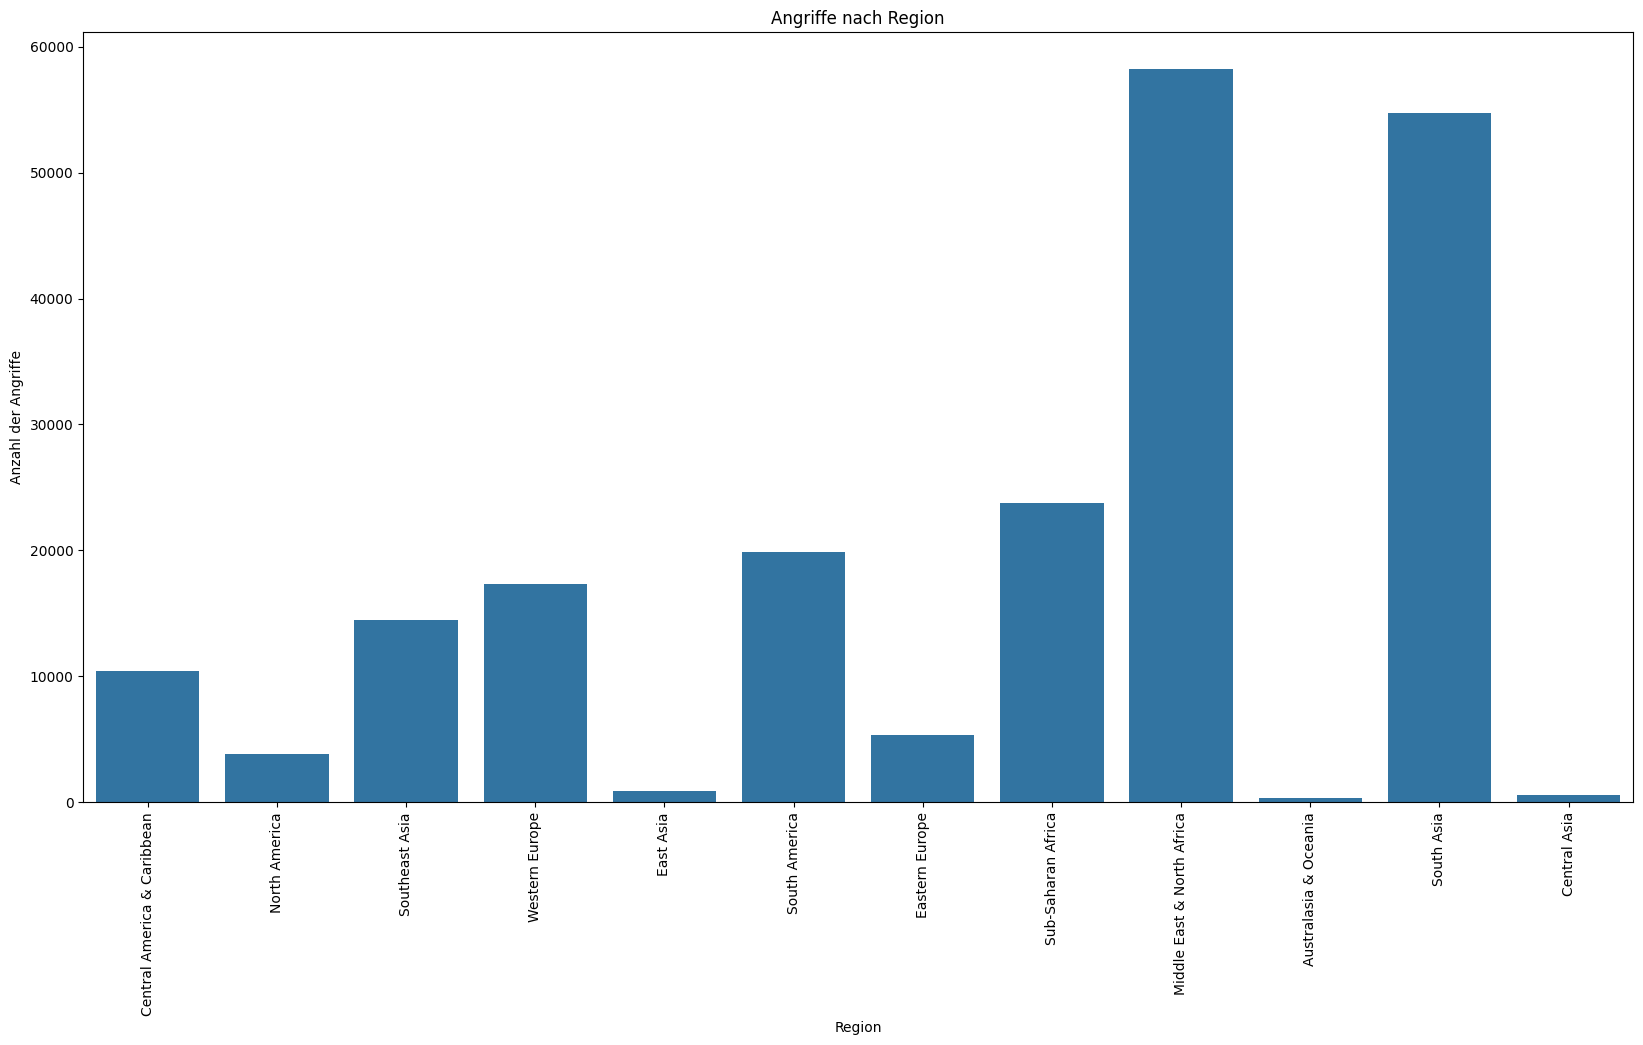

In [9]:
# Angriffe nach Region
plt.figure(figsize=(20,10))
sns.countplot(x='region_txt', data=df)
plt.title('Angriffe nach Region')   
plt.xlabel('Region')
plt.ylabel('Anzahl der Angriffe')
plt.xticks(rotation=90)
plt.show()


Dieses Diagramm verdeutlicht, dass die Anzahl der Angriffe regional stark variiert und in bestimmten Regionen signifikant höher ist. Höchst wahrscheinlich aufgrund von geopolitischen Spannungen oder regionalen Konflikten.

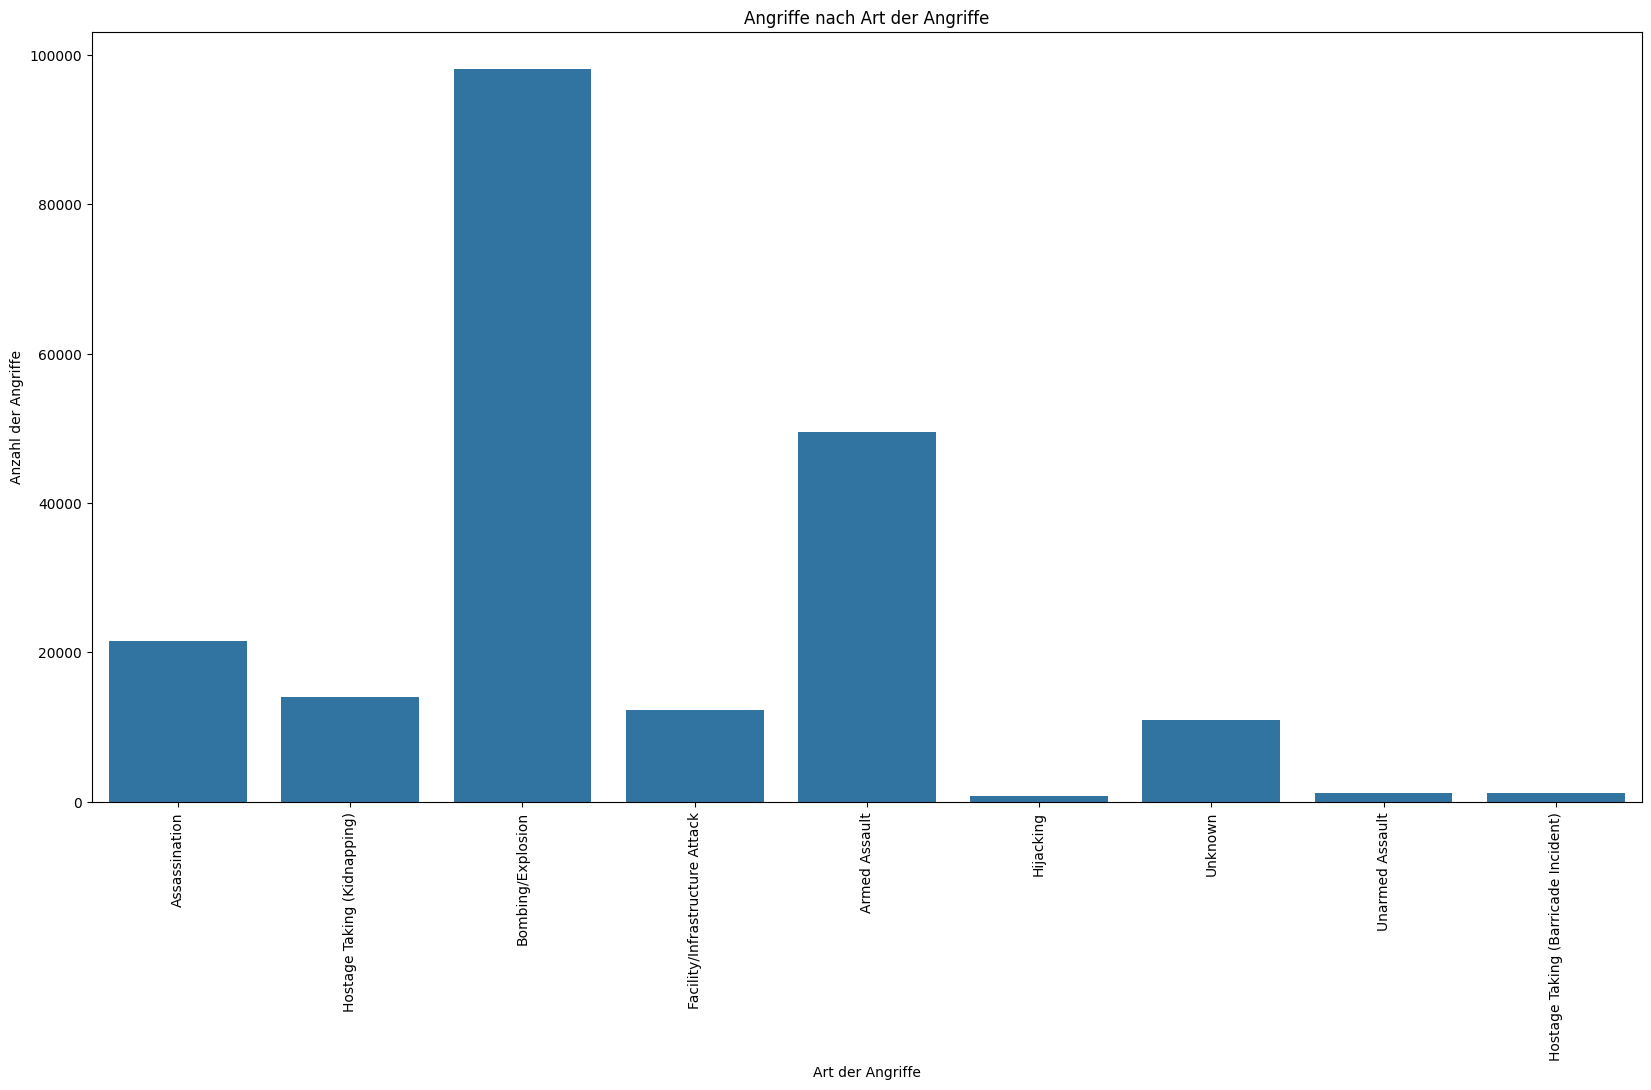

In [10]:
# Angriffe nach Art der Angriffe
plt.figure(figsize=(20,10))
sns.countplot(x='attacktype1_txt', data=df)
plt.title('Angriffe nach Art der Angriffe')
plt.xlabel('Art der Angriffe')
plt.ylabel('Anzahl der Angriffe')
plt.xticks(rotation=90)
plt.show()

- **Bombing/Explosion** ist mit nahezu 100.000 Angriffen die häufigste Art, die weit mehr Vorfälle aufweist als alle anderen Kategorien.
- **Armed Assault** liegt mit einer beträchtlichen Anzahl an Angriffen ebenfalls hoch, aber deutlich unterhalb von Bombing/Explosion.
- Weitere häufige Angriffstypen sind **Assassination** und **Hostage Taking (Kidnapping)**, die jeweils zwischen 10.000 und 30.000 Vorfälle aufweisen.
- Kategorien wie **Hijacking**, **Unnamed Assault** und **Hostage Taking (Barricade Incident)** treten im Vergleich sehr selten auf.


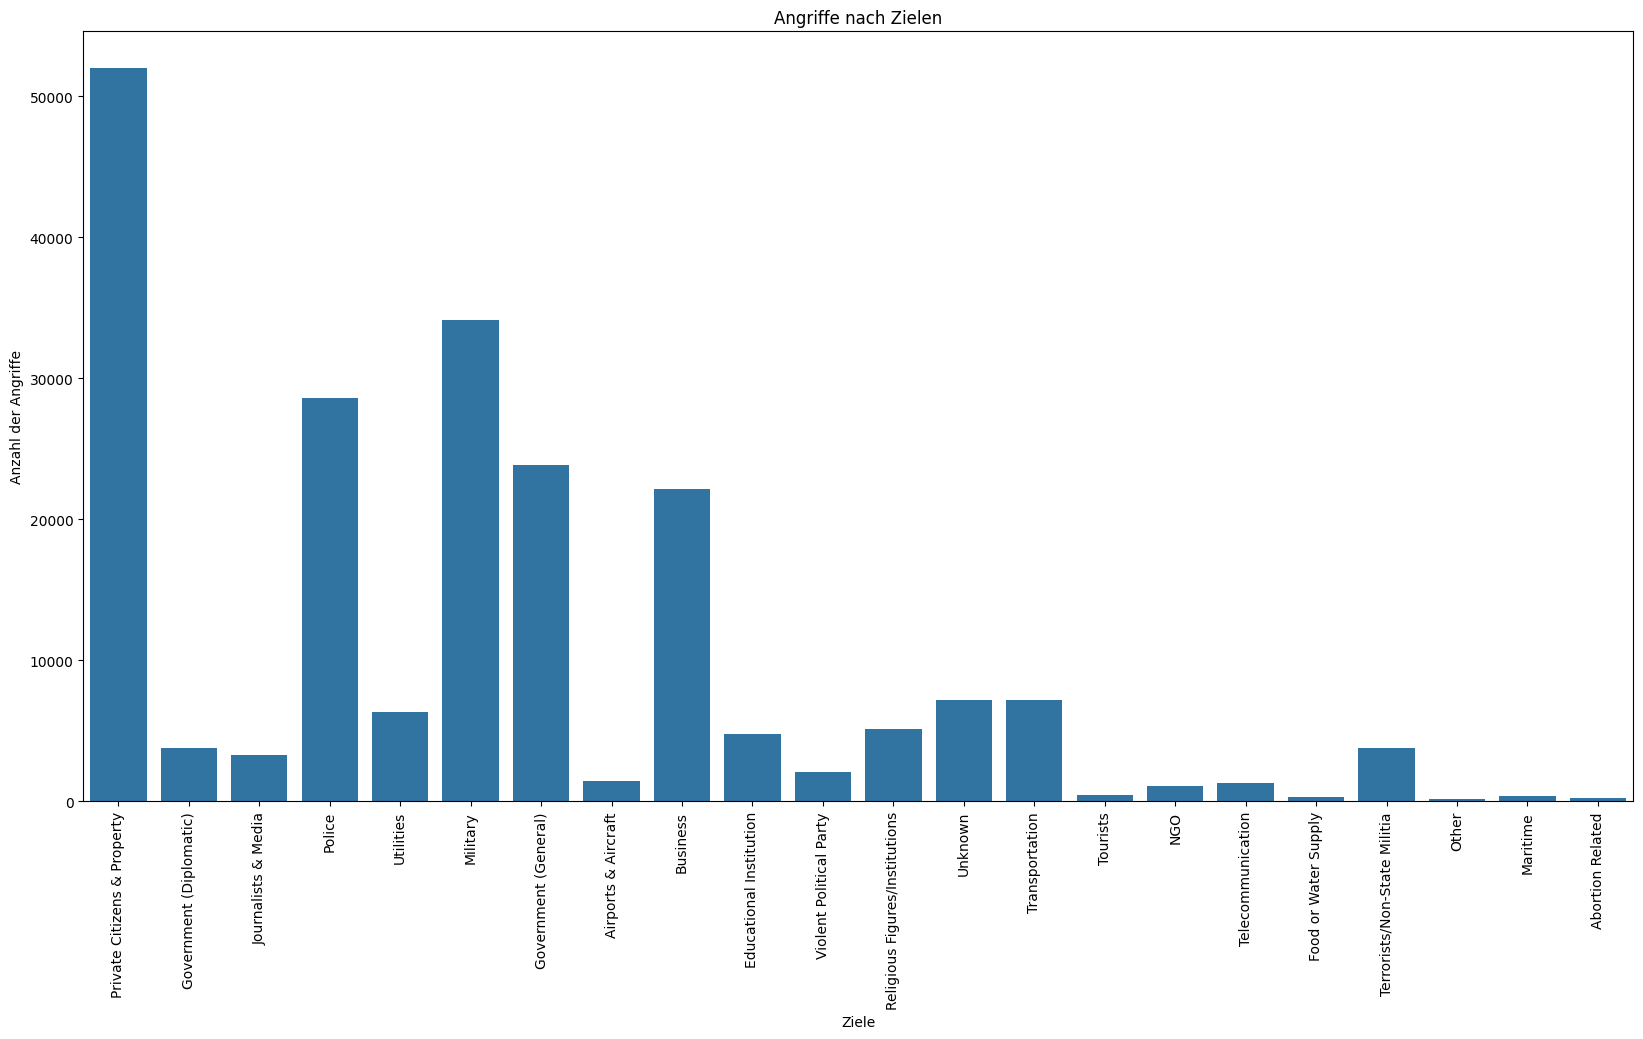

In [11]:
# Angriffe nach Zielen
plt.figure(figsize=(20,10))
sns.countplot(x='targtype1_txt', data=df)
plt.title('Angriffe nach Zielen')
plt.xlabel('Ziele')
plt.ylabel('Anzahl der Angriffe')
plt.xticks(rotation=90)
plt.show()


Dieses Diagramm verdeutlicht, dass Angriffe häufig auf Zivilpersonen und bestimmte kritische Institutionen wie Polizei und Militär abzielen.

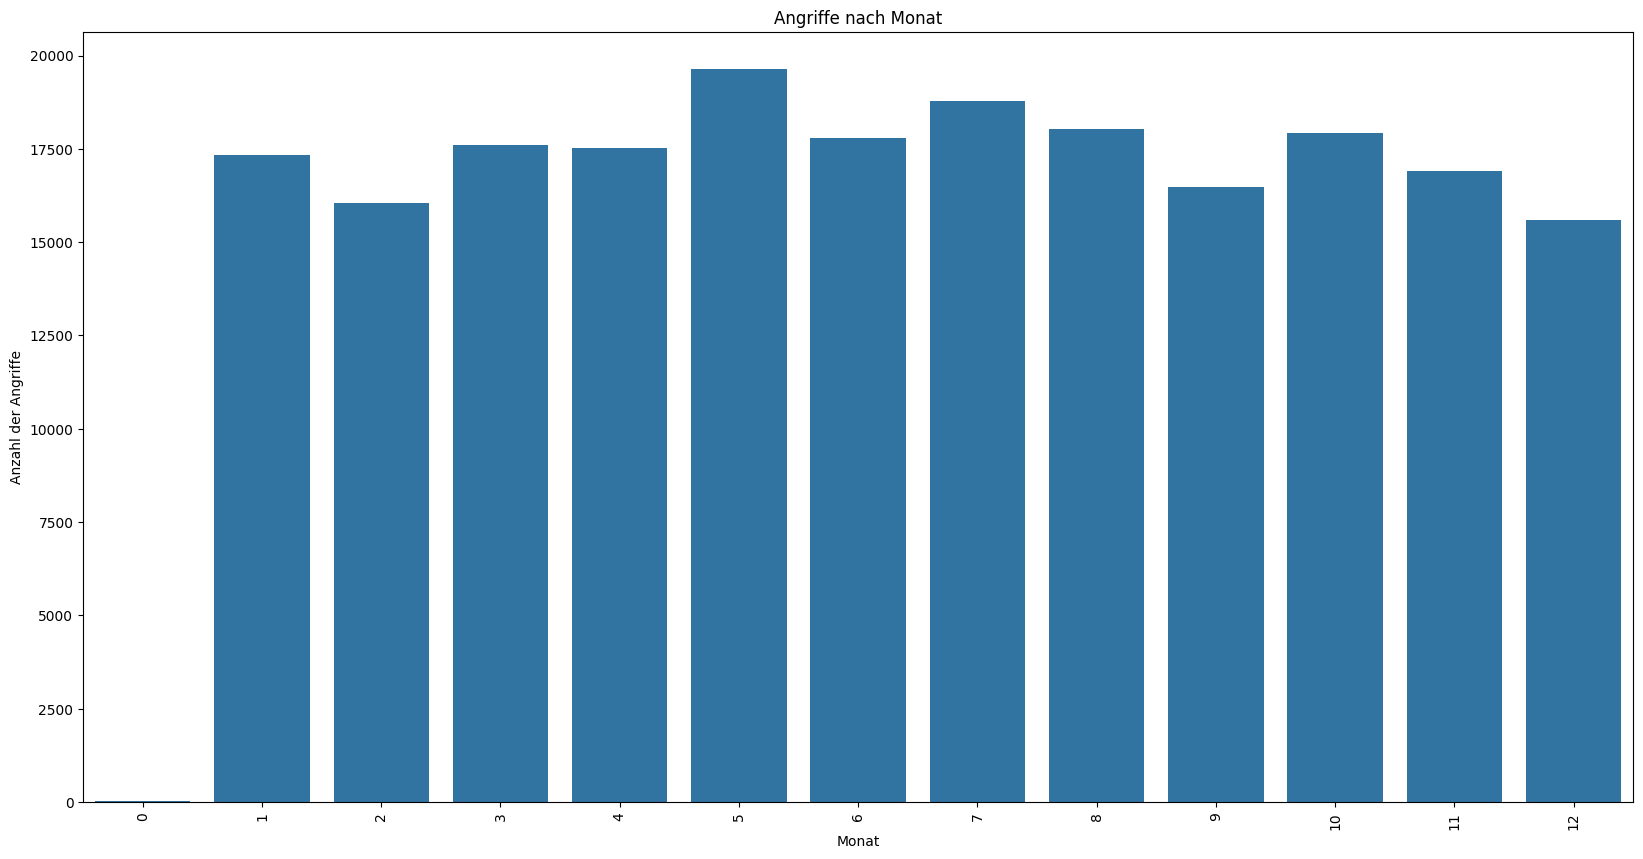

In [12]:
# Angriffe nach Monat
plt.figure(figsize=(20,10))
sns.countplot(x='imonth', data=df)
plt.title('Angriffe nach Monat')
plt.xlabel('Monat')
plt.ylabel('Anzahl der Angriffe')
plt.xticks(rotation=90)
plt.show()

Dieses Diagramm deutet darauf hin, dass die Anzahl der Angriffe relativ gleichmässig über das Jahr verteilt ist, ohne signifikante Spitzen oder Tiefpunkte in bestimmten Monaten.

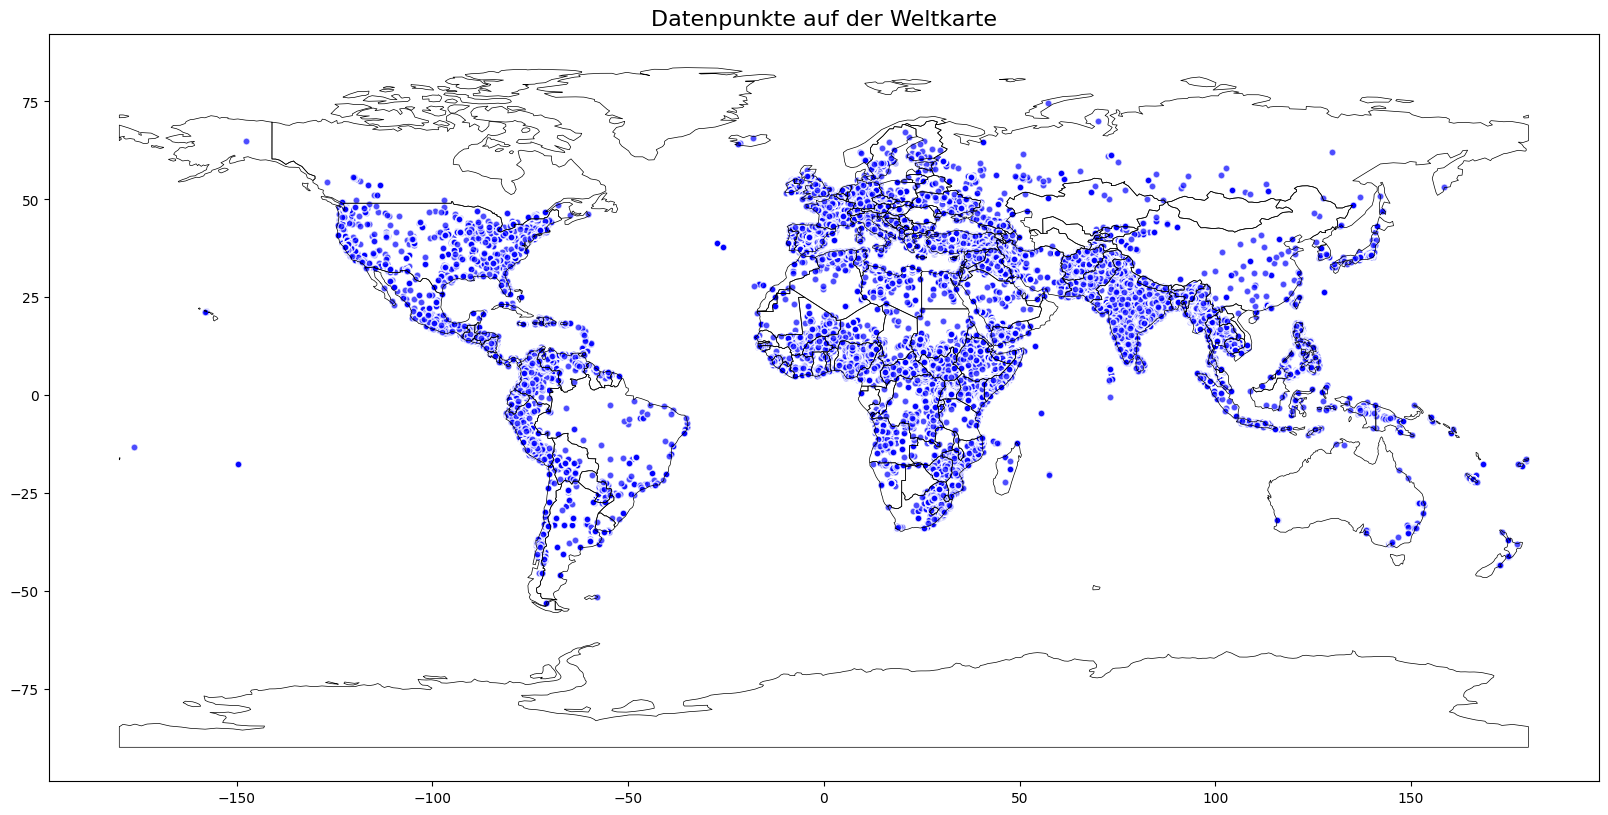

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Koordinaten in ein Point-Objekt umwandeln
df['coordinates'] = list(zip(df.longitude, df.latitude))
df['coordinates'] = df['coordinates'].apply(Point)

# Geopandas DataFrame erstellen
gdf = gpd.GeoDataFrame(df, geometry='coordinates')

# Weltkarte laden
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")

# Plot erstellen
fig, ax = plt.subplots(figsize=(20, 20))

# Weltkarte: nur Ländergrenzen
world.boundary.plot(ax=ax, color='black', linewidth=0.5, label='Ländergrenzen')

# Punkte des GeoDataFrames
gdf.plot(ax=ax, color='blue', edgecolor='white', markersize=25, alpha=0.7, label='Datenpunkte')

ax.set_title('Datenpunkte auf der Weltkarte', fontsize=16)
plt.show()


- **Hohe Konzentrationen** von Angriffen sind in bestimmten Regionen deutlich sichtbar, insbesondere im **Nahen Osten**, in **Süd- und Zentralasien** (insbesondere Indien, Pakistan und Afghanistan) sowie in **Nord- und Ostafrika**.
- In **Lateinamerika** sind ebenfalls Cluster von Angriffen erkennbar, insbesondere in Regionen wie Kolumbien und Mexiko.
- Regionen wie **Australien** und **Ost- und Südostasien** weisen nur wenige Angriffspunkte auf.

Diese Karte verdeutlicht die geografische Konzentration von Angriffen, wobei bestimmte Konflikt- und Krisengebiete besonders stark betroffen sind.

2.4310296735453574


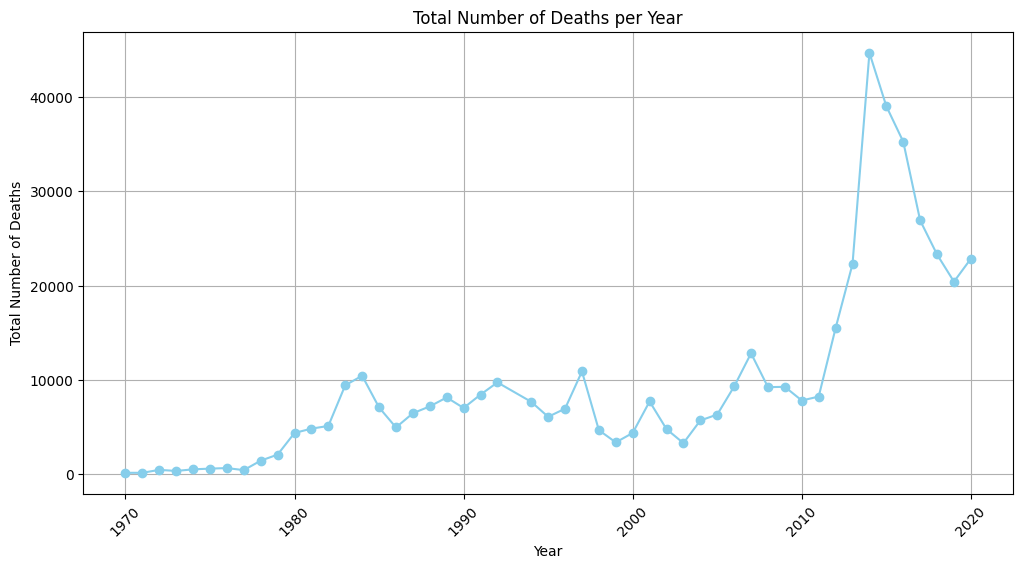

In [14]:
# durchschittliche Anzahl der Todesopfer pro Angriff
print(df['nkill'].mean())

# Aggregieren der totalen Anzahl der Todesopfer pro Jahr
total_deaths_per_year = df.groupby('iyear')['nkill'].sum().reset_index()

# Visualisierung als Liniendiagramm
plt.figure(figsize=(12, 6))
plt.plot(total_deaths_per_year['iyear'], total_deaths_per_year['nkill'], marker='o', color='skyblue')
plt.title('Total Number of Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Deaths')
plt.xticks(rotation=45)
plt.grid()
plt.show()

- Von den 1970er Jahren bis etwa 2010 zeigt die Anzahl der Todesopfer eine insgesamt steigende Tendenz mit einigen Schwankungen, jedoch ohne drastische Anstiege.
- Ab etwa 2010 beginnt die Anzahl der Todesopfer rapide anzusteigen und erreicht um 2014 einen Höhepunkt von über 40.000 Todesopfern in einem Jahr.
- Nach diesem Höhepunkt geht die Anzahl der Todesopfer wieder zurück, bleibt aber insgesamt höher als in den Jahrzehnten vor 2010.

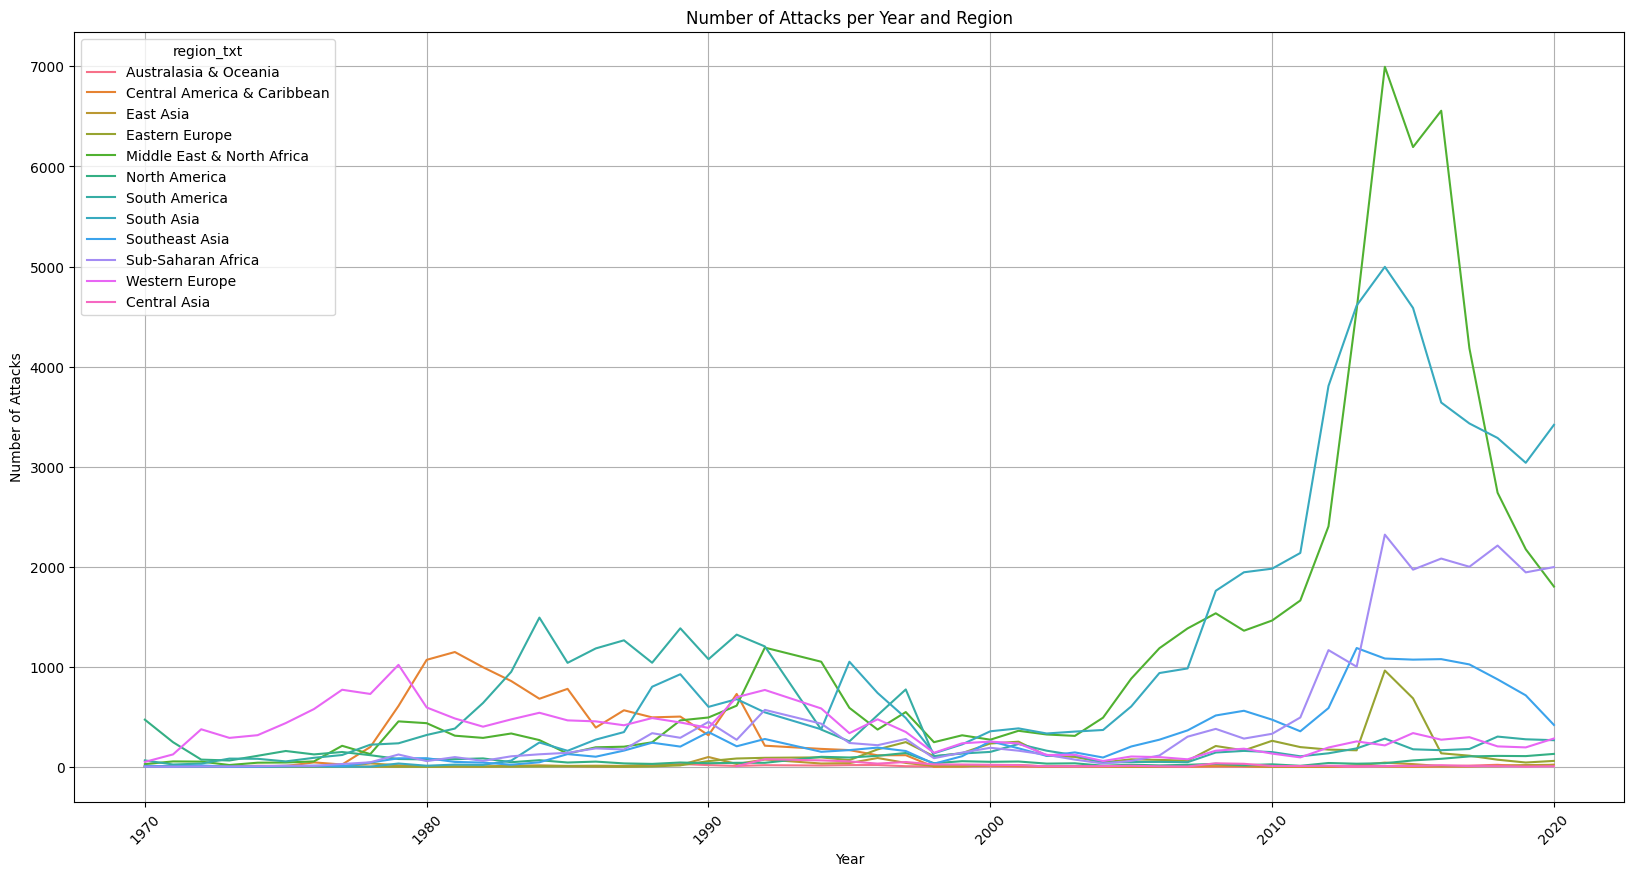

In [15]:
# entwicklung der Anzahl der Angriffe pro Jahr und Region
attacks_per_year_region = df.groupby(['iyear', 'region_txt']).size().reset_index(name='attack_count')

plt.figure(figsize=(20, 10))
sns.lineplot(x='iyear', y='attack_count', hue='region_txt', data=attacks_per_year_region)
plt.title('Number of Attacks per Year and Region')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.grid()
plt.show()

-  Die Region **Middle East & North Africa** verzeichnet ab etwa 2010 einen starken Anstieg der Angriffszahlen, die um 2014 einen Höhepunkt erreichen und dann wieder zurückgehen.
- **South Asia** und **Sub-Saharan Africa** zeigen ebenfalls signifikante Anstiege in den 2010er Jahren, jedoch weniger ausgeprägt als im Nahen Osten und Nordafrika.
- Regionen wie **Western Europe** und **Central America & Caribbean** weisen moderate Angriffszahlen auf, mit Spitzen in den 1980er und 1990er Jahren.
- Regionen wie **Australasia & Oceania** und **East Asia** verzeichnen über den gesamten Zeitraum hinweg nur wenige Angriffe.

Dieses Diagramm zeigt deutliche regionale Unterschiede in der Häufigkeit von Angriffen, wobei bestimmte Konfliktregionen, insbesondere im Nahen Osten, in den letzten Jahrzehnten besonders betroffen sind.


## 3. Unifying & Transformation

<u>Datenanreicherung mit zusätzlichen Indikatoren</u>

Zur Vertiefung der Analyse terroristischer Aktivitäten werden die Daten um relevante sozioökonomische und sicherheitsrelevante Indikatoren von https://data.worldbank.org/ ergänzt, um Zusammenhänge und Muster besser zu erkennen.


<u>Ausgewählte Indikatoren</u>

*GDP per capita*: Mass für die wirtschaftliche Entwicklung.<br>
*Militärausgaben*: Absolut und als BIP-Anteil, zeigen Investitionen in Sicherheit.<br>
*Nettohandel*: Hinweis auf wirtschaftliche Integration.<br>
*Arbeitslosigkeit*: Indikator für soziale Spannungen.<br>
*Tourismusausgaben*: Grad der globalen Vernetzung.<br>
*Ease of Doing Business*: Mass für wirtschaftliche Offenheit.<br>

<U>Relevanz der Indikatoren</u>

Diese Variablen spiegeln Bedingungen wider, die terroristische Aktivitäten beeinflussen können, z. B. soziale Instabilität, Sicherheitslage, wirtschaftliche Integration und globale Vernetzung. Die Anreicherung verbessert die Aussagekraft der Analyse und fördert ein tieferes Verständnis der Einflussfaktoren.

In [16]:
# Datenset zu Wirtschaftsdaten laden
df2 = pd.read_excel('data/P_Data_Extract_From_World_Development_Indicators.xlsx')

In [17]:
# Struktur der Daten anzeigen
df2.head()

,Country Name,Country Code,Series Name,Series Code,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,180.188369,142.903364,182.174038,199.643227,221.830531,254.115276,274.015392,376.3183,382.533807,453.387385,562.499222,608.73885,653.417475,638.733181,626.512929,566.88113,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,..
1,Afghanistan,AFG,Military expenditure (current USD),MS.MIL.XPND.CD,2939585.501254,..,..,3341271.55123,3581366.35143,4203664.568655,5393251.215945,6127288.063335,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,125111557.457054,122727193.134874,131346231.269517,219580214.296198,240532594.620985,251869514.820335,298147102.825701,325806949.72333,238583385.374322,217194107.113298,268238787.719988,199517108.764826,185878310.062383,191407113.244397,198074728.574408,226306243.729258,279576954.925193,278250788.014927,..,..
2,Afghanistan,AFG,"Net trade in goods and services (BoP, current ...",BN.GSR.GNFS.CD,..,..,..,..,..,..,..,..,..,-205100000,-176800000,-337700000,-212700000,-263000000,-579800000,-407500000,-793800000,-486500000,-328400000,-466400000,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,-1877652994.15051,-1956521857.76781,-3205300950.54898,-4149500356.09605,-7442378553.20737,-8671425447.584789,-6261263543.711,-7044964161.23314,-6191463867.404961,-6803560118.47488,-6378166942.375891,-5855061056.028919,-5506547001.36988,..,..,..
3,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,2.495,..,..,..,1.692,..,7.915,..,..,11.184,..,..,11.71,5.679,..,..
4,Afghanistan,AFG,"International tourism, expenditures (current US$)",ST.INT.XPND.CD,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,38000000,70000000,106000000,255000000,110000000,138000000,140000000,151000000,89000000,130000000,226000000,168000000,49000000,..,..,..


In [18]:
# Umwandlung des DataFrames in ein langes Format (von "wide" zu "long")
df2_melted = df2.melt(id_vars=["Country Name", "Country Code", "Series Name", "Series Code"],
                    var_name="Year", 
                    value_name="Value")

# Extrahiere die Jahreszahlen aus der 'Year' Spalte und konvertiere sie zu Integern
df2_melted['Year'] = df2_melted['Year'].str.extract(r'(\d{4})').astype(int)

# Pivotieren des DataFrames, sodass jedes Jahr eine separate Zeile hat
df2_pivoted = df2_melted.pivot_table(index=["Country Name", "Country Code", "Year"], 
                                     columns=["Series Name"], 
                                     values="Value", 
                                     aggfunc="first")

# Reset der Indexes und Aufräumen der Datenstruktur
df2_pivoted.reset_index(inplace=True)

# Zeige die ersten Zeilen des umgewandelten DataFrames an
df2_pivoted.head()

Series Name,Country Name,Country Code,Year,Ease of doing business score (0 = lowest performance to 100 = best performance),GDP per capita (current US$),"International tourism, expenditures (% of total imports)","International tourism, expenditures (current US$)",Military expenditure (% of GDP),Military expenditure (current USD),"Net trade in goods and services (BoP, current US$)","Unemployment, total (% of total labor force) (national estimate)"
0,Afghanistan,AFG,1970,..,..,..,..,1.629606,2939585.501254,..,..
1,Afghanistan,AFG,1971,..,..,..,..,..,..,..,..
2,Afghanistan,AFG,1972,..,..,..,..,..,..,..,..
3,Afghanistan,AFG,1973,..,..,..,..,1.86891,3341271.55123,..,..
4,Afghanistan,AFG,1974,..,..,..,..,1.610825,3581366.35143,..,..


In [19]:
# df1 und df2_pivoted zusammenführen
df_merged = df.merge(df2_pivoted, how='left', left_on=['country_txt', 'iyear'], right_on=['Country Name', 'Year'])

In [20]:
# df_merged anzeigen
df_merged.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,coordinates,Country Name,Country Code,Year,Ease of doing business score (0 = lowest performance to 100 = best performance),GDP per capita (current US$),"International tourism, expenditures (% of total imports)","International tourism, expenditures (current US$)",Military expenditure (% of GDP),Military expenditure (current USD),"Net trade in goods and services (BoP, current US$)","Unemployment, total (% of total labor force) (national estimate)"
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,POINT (-69.951164 18.456792),Dominican Republic,DOM,1970.0,..,331.890709,..,..,2.416695,35900000,-107200000,..
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,POINT (-99.086624 19.371887),Mexico,MEX,1970.0,..,706.313187,..,..,0.497412,176800000,..,..
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,Na

In [21]:
# Daten einlesen
df3 = pd.read_excel('data\API_PV.PER.RNK_DS2_en_excel_v2_10224.xlsx', sheet_name='Data', skiprows=3)

<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\elias\AppData\Local\Temp\ipykernel_13556\1999189738.py:2: SyntaxWarning: invalid escape sequence '\A'
  df3 = pd.read_excel('data\API_PV.PER.RNK_DS2_en_excel_v2_10224.xlsx', sheet_name='Data', skiprows=3)


In [22]:
# Daten anzeigen
df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Political Stability and Absence of Violence/Te...,PV.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.582527,96.116508,96.135269,96.618355,96.153847,88.625595,88.151657,93.838860,93.364929,94.786728,92.380951,92.380951,93.333336,95.238098,95.283020,95.754715,96.226418,97.169815,97.641510,NaN
1,Africa Eastern and Southern,AFE,Political Stability and Absence of Violence/Te...,PV.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.127660,NaN,0.531915,NaN,0.529101,NaN,1.587302,2.01005,1.941748,2.427185,1.449275,1.449275,0.480769,0.473934,1.421801,1.421801,1.895735,1.421801,2.857143,0.952381,0.952381,0.476190,0.471698,0.943396,0.471698,1.415094,0.471698,NaN
3,Africa Western and Central,AFW,Political Stability and Absence of Violence/Te...,PV.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Political Stability and Absence of Violence/Te...,PV.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.723404,NaN,1.063830,NaN,1.587302,NaN,9.523809,19.59799,16.504854,21.359222,28.019323,24.154589,31.250000,32.701424,37.914692,34.597157,35.071091,35.071091,32.857143,28.095238,33.333332,30.476191,34.905659,31.603773,24.528301,21.226416,22.641510,NaN


In [23]:
# pivotieren der Daten so dass jedes Jahr eine separate Zeile hat
df3_pivoted = df3.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
                       var_name="Year", 
                       value_name="Value")

# daten anzeigen
df3_pivoted.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,Political Stability and Absence of Violence/Te...,PV.PER.RNK,1960,NaN
1,Africa Eastern and Southern,AFE,Political Stability and Absence of Violence/Te...,PV.PER.RNK,1960,NaN
2,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.PER.RNK,1960,NaN
3,Africa Western and Central,AFW,Political Stability and Absence of Violence/Te...,PV.PER.RNK,1960,NaN
4,Angola,AGO,Political Stability and Absence of Violence/Te...,PV.PER.RNK,1960,NaN


In [24]:
# Daten so umwandeln, dass wir nur die Spalte "Country Name", "Year" und "Value" haben
df3_pivoted = df3_pivoted[["Country Name", "Year", "Value"]]

# spaltenname Value umbenennen in "Political Stability and Absence of Violence"
df3_pivoted.rename(columns={"Value": "Political Stability and Absence of Violence"}, inplace=True)

# Daten anzeigen
df3_pivoted.head()

,Country Name,Year,Political Stability and Absence of Violence
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,NaN
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,NaN
4,Angola,1960,NaN


In [25]:
# Spalte "Year" in Integer umwandeln
df3_pivoted['Year'] = df3_pivoted['Year'].astype(int)

In [26]:
# Extrahiere die eindeutigen Ländernamen
countries_df1 = set(df['country_txt'].unique())
countries_df2 = set(df3_pivoted['Country Name'].unique())

# Identifiziere Abweichungen
mismatched_countries = countries_df2.difference(countries_df1)
print("Nicht übereinstimmende Ländernamen in df3_pivoted:", mismatched_countries)

# identifiziere Ländernamen die in df_merged fehlen
mismatched_countries2 = countries_df1.difference(countries_df2)
print("Nicht übereinstimmende Ländernamen in df:", mismatched_countries2)

Nicht übereinstimmende Ländernamen in df3_pivoted: {'Europe & Central Asia (excluding high income)', 'Bermuda', 'Tonga', 'Middle East & North Africa (IDA & IBRD countries)', 'East Asia & Pacific (IDA & IBRD countries)', 'Liechtenstein', 'Congo, Dem. Rep.', 'Fragile and conflict affected situations', 'Euro area', 'Kyrgyz Republic', 'Africa Eastern and Southern', 'Isle of Man', 'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa (IDA & IBRD countries)', 'West Bank and Gaza', 'IDA total', 'Lao PDR', 'Pacific island small states', 'Palau', 'IDA & IBRD total', 'Venezuela, RB', 'Latin America & Caribbean', 'East Asia & Pacific', 'Viet Nam', 'Hong Kong SAR, China', 'Sint Maarten (Dutch part)', 'Oman', 'Middle East & North Africa (excluding high income)', 'Africa Western and Central', 'Faroe Islands', 'European Union', 'Brunei Darussalam', 'Samoa', 'Aruba', 'Upper middle income', 'Macao SAR, China', 'OECD members', 'Sub-Saharan Africa', 'St. Vincent and the Grenadines', 'Nauru', 

In [27]:
# Mapping der Ländernamen in df3_pivoted zu den Ländernamen in df
country_mapping = {
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
    'Congo, Rep.': 'Republic of the Congo',
    'Egypt, Arab Rep.': 'Egypt',
    'Iran, Islamic Rep.': 'Iran',
    'Korea, Rep.': 'South Korea',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Lao PDR': 'Laos',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Venezuela, RB': 'Venezuela',
    'Yemen, Rep.': 'Yemen',
    'Korea, Dem. People’s Rep.': 'North Korea',
    'Cote d\'Ivoire': 'Ivory Coast',
    'Tukiye': 'Turkey',
    'Venecuela, RB': 'Venezuela',
    'Gambia, The': 'Gambia',
    'West Bank and Gaza' : 'West Bank and Gaza Strip',
    'Bahamas, The': 'Bahamas',
    'Czechnia': 'Czech Republic',
    'Bosnia and Herzegovina': 'Bosnia-Herzegovina',
    'Viet Nam': 'Vietnam',
    'North Macedonia': 'Macedonia',
    'Hong Kong SAR, China': 'Hong Kong',
    'Syrian Arab Republic': 'Syria',
    'Brunei Darussalam': 'Brunei',
    'Timor-Leste': 'East Timor',
    'Lao PDR': 'Laos',
}

# Mapping der Ländernamen in df3_pivoted
df3_pivoted['Country Name'] = df3_pivoted['Country Name'].replace(country_mapping)

In [35]:
# df und df3_pivoted zusammenführen
df_merged = df.merge(df3_pivoted, how='left', left_on=['country_txt', 'iyear'], right_on=['Country Name', 'Year'])

# df_merged anzeigen
df_merged.head()

# letzte 5 Zeilen anzeigen
df_merged.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,coordinates,Country Name,Year,Political Stability and Absence of Violence
209701,202012310015,2020,12,31,2020-12-31 00:00:00,0,NaT,228,Yemen,10,Middle East & North Africa,Al Hudaydah,Sabaa,15.305307,43.019490,2.0,0,NaN,12/31/2020: Assailants fired mortar shells tar...,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Residences,228.0,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houthi extremists (Ansar Allah),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,NaN,0.0,0.0,NaN,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,Houses and buildings damaged,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Al Houthi militia escalated in Hays and targe...",NaN,NaN,START Primary Collection,0,0,0,0,NaN,POINT (43.01949 15.305307),Yemen,2020.0,0.943396
209702,202012310016,2020,12,31,2020-12-31 00:00:00,0,NaT,228,Yemen,10,Middle East & North Africa,Al Hudaydah,Beit Maghari,13.931337,43.478924,2.0,0,The incident occurred in the Hays district.,12/31/2020: Assailants attempted to plant expl...,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Residences,228.0,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houthi extremists (Ansar Allah),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,8.0,Landmine,6.0,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Al Houthi militia escalated in Hays and targe...",NaN,NaN,START Primary Collection,0,0,0,0,NaN,POINT (43.478924 13.931337),Yemen,2020.0,0.943396
209703,202012310017,2020,12,31,NaN,0,NaT,75,Germany,8,Western Europe,Lower Saxony,Leipzig,51.342239,12.374772,1.0,0,NaN,12/31/2020: Assailants set fire to German Army...,1,1,0,1,1.0,Insurgency/Guerilla Action,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,4,Military,35.0,Military Transportation/Vehicle (excluding con...,German Army,Wolf-Class Vehicles,75.0,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left-wing extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,7.0,"Posted to website, blog, etc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 4. Data Cleansing

In [29]:
# info über die Daten
df_merged.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 150 columns):
 #    Column                                                                           Non-Null Count   Dtype         
---   ------                                                                           --------------   -----         
 0    eventid                                                                          209706 non-null  int64         
 1    iyear                                                                            209706 non-null  int64         
 2    imonth                                                                           209706 non-null  int64         
 3    iday                                                                             209706 non-null  int64         
 4    approxdate                                                                       12689 non-null   object        
 5    extended                                         

In [30]:
# Umformatierne der Datumspalte in ein Datetime Objekt
df_merged['datetime'] = pd.to_datetime(df_merged['iyear'].astype(str) + '-' + df_merged['imonth'].astype(str) + '-' + df_merged['iday'].astype(str), errors='coerce')

In [31]:
# Ersetzen von ".." im Dataframe mit Null
df_merged.replace('..', np.nan, inplace=True)

C:\Users\elias\AppData\Local\Temp\ipykernel_13556\3048324451.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged.replace('..', np.nan, inplace=True)


In [32]:
df_merged.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,coordinates,Country Name_x,Country Code,Year_x,Ease of doing business score (0 = lowest performance to 100 = best performance),GDP per capita (current US$),"International tourism, expenditures (% of total imports)","International tourism, expenditures (current US$)",Military expenditure (% of GDP),Military expenditure (current USD),"Net trade in goods and services (BoP, current US$)","Unemployment, total (% of total labor force) (national estimate)",Country Name_y,Year_y,Political Stability and Absence of Violence,datetime
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,POINT (-69.951164 18.456792),Dominican Republic,DOM,1970.0,NaN,331.890709,NaN,NaN,2.416695,3.590000e+07,-107200000.0,NaN,Dominican Republic,1970.0,NaN,1970-07-02
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,POINT (-99.086624 19.371887),Mexico,MEX,1970.0,NaN,706.313187,NaN,NaN,0.497412,1.768000e+08,NaN,NaN,Mexico,1970.0,NaN,NaT
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N

## 5. Analysis & Validation

## 6. Feature Selection & Engineering

## 7. Anwendung in Machine Learning

## 8. Anwendung von XAI - Techniken

## 9. Fazit

## 10. Quellenverzeichnis

START (National Consortium for the Study of Terrorism and Responses to Terrorism) (2022). *Global Terrorism Database 1970 - 2020 [Data set].* https://www.start.umd.edu/gtd

